In [26]:
from MRF_non_random import *
import matplotlib.pyplot as plt

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_data.csv")

In [34]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,4), B= 200, oos_pos=np.arange(150,200),trend_push=4,quantile_rate=0.3, print_b = True)

In [35]:
mrf_output = MRF._ensemble_loop()

Tree 1 out of 200
Tree 2 out of 200
Tree 3 out of 200
Tree 4 out of 200
Tree 5 out of 200
Tree 6 out of 200
Tree 7 out of 200
Tree 8 out of 200
Tree 9 out of 200
Tree 10 out of 200
Tree 11 out of 200
Tree 12 out of 200
Tree 13 out of 200
Tree 14 out of 200
Tree 15 out of 200
Tree 16 out of 200
Tree 17 out of 200
Tree 18 out of 200
Tree 19 out of 200
Tree 20 out of 200
Tree 21 out of 200
Tree 22 out of 200
Tree 23 out of 200
Tree 24 out of 200
Tree 25 out of 200
Tree 26 out of 200
Tree 27 out of 200
Tree 28 out of 200
Tree 29 out of 200
Tree 30 out of 200
Tree 31 out of 200
Tree 32 out of 200
Tree 33 out of 200
Tree 34 out of 200
Tree 35 out of 200
Tree 36 out of 200
Tree 37 out of 200
Tree 38 out of 200
Tree 39 out of 200
Tree 40 out of 200
Tree 41 out of 200
Tree 42 out of 200
Tree 43 out of 200
Tree 44 out of 200
Tree 45 out of 200
Tree 46 out of 200
Tree 47 out of 200
Tree 48 out of 200
Tree 49 out of 200
Tree 50 out of 200
Tree 51 out of 200
Tree 52 out of 200
Tree 53 out of 200
Tr

In [36]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [37]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions_1.csv", index_col = "Unnamed: 0")

In [38]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [39]:
my_preds.columns = np.arange(150, 200)

In [40]:
phils_preds.columns = my_preds.columns

In [41]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF_betas.csv", index_col = "Unnamed: 0")

In [42]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [43]:
phils_betas.columns = my_betas.columns

In [44]:
phils_betas.index = my_betas.index

In [45]:
phils_betas.columns = my_betas.columns

Text(0.5, 0.98, 'Betas from Python and R implementation. Python (light) and R (dark) colors.')

[20.0, 10.0]

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

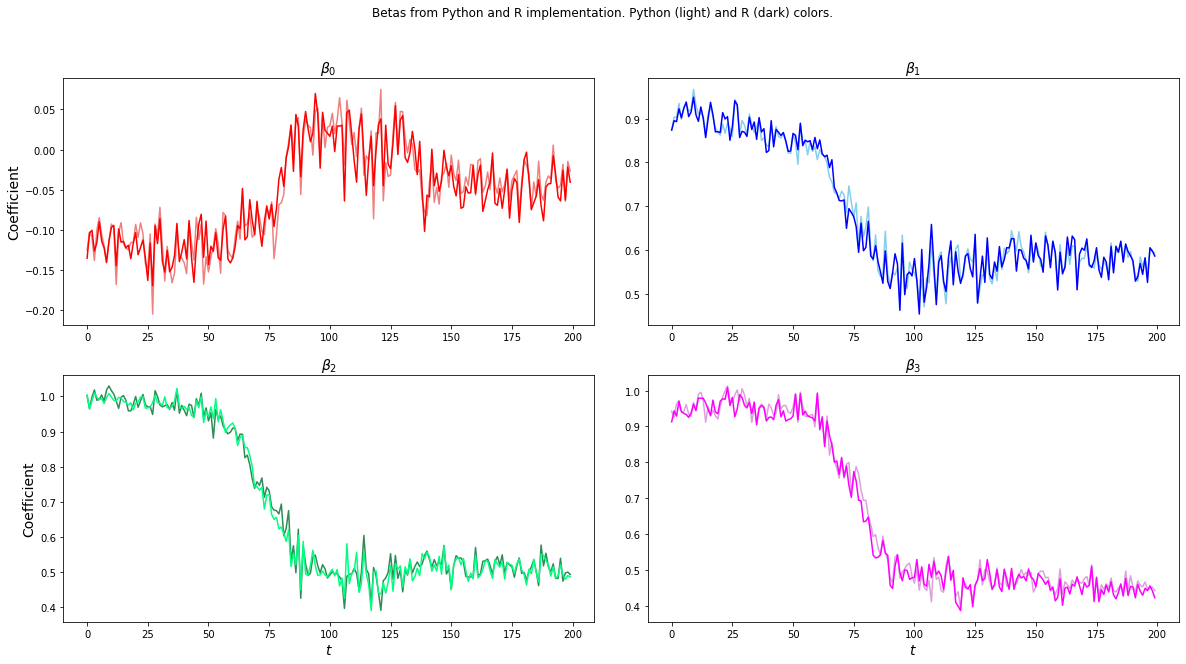

In [49]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("Betas from Python and R implementation. Python (light) and R (dark) colors.")

plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

plt.rcParams['figure.figsize'] = (20, 10)
ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])

ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])

ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])

ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])
ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])


ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [ ]:
mrf_output.keys()

Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, 'R versus Python implementation: average of forecasts')

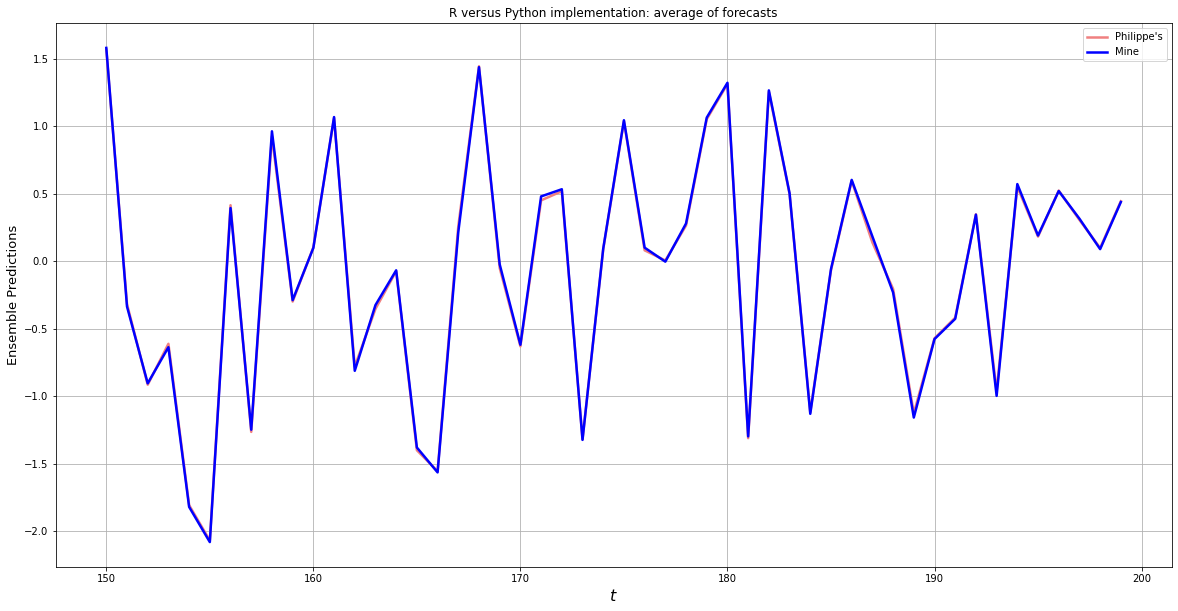

In [50]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("R versus Python implementation: average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)